a) The average function $\bar{g}(x)$ denotes $\mathbf{E}_{D}[g^{(D)}(x)]$.

Since H consists of the functions in the form h(x) = ax + b, we choose the line that passes through the two data points 
$(x_{1}, x_{1}^2)$ and $(x_{2}, x_{1}^2)$.

The Equation of a line that passes through a point is $ y - y_{1} = m(x - x_{1})$
where m is the slope of the line. We can find the slope from two the points:

m = $(\frac{x_{2}^2-x_{1}^2}{x_{2}-x_{1}})$
$ = x_{1} + x_{2} $

$ \hat{y} - x_{1}^2  = (x_{1} + x_{2})(x - x_{1})$

$ \hat{y} = (x_{1} + x_{2})(x - x_{1}) + x_{1}^2 $

$         = x_{1}x - x_{1}^2 + x_{2}x - x_{2}x_{1} + x_{1}^2 $

$         = x_{1}x + x_{2}x - x_{2}x_{1} $

$         = (x_{1}+ x_{2})x - x_{2}x_{1} $

So based on that line, we can find $\bar{g}(x)$:

$ \bar{g}(x) = \mathbf{E}_{D}[ (x_{1}+ x_{2})x - x_{2}x_{1}] $

$= \mathbf{E}_{x_{1}, x_{2}}[(x_{1}+ x_{2})x - x_{2}x_{1} ] $

$= {\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [(x_{1}+ x_{2})x - x_{2}x_{1} ]*p(x_{1})*p(x_{2}) \,dx_{1}dx_{2}} $

$= \frac{1}{2}*\frac{1}{2}{\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [ (x_{1}+ x_{2})x - x_{2}x_{1}] \,dx_{2}dx_{1}} $

$=0$





In [3]:
import matplotlib.pyplot as plt
import numpy as np


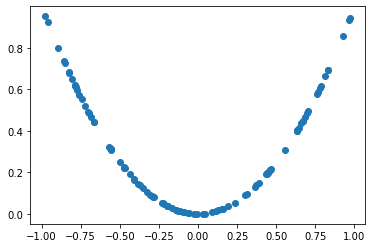

In [23]:
def generate_data(seed_num):
    rng = np.random.default_rng(seed = seed_num)
    size = 100
    return rng.uniform(size=size) * rng.choice([-1,1], size)

x = generate_data(42)
y = np.square(x)
plt.scatter(x,y)
plt.show()

